In [1]:
!pip install pandas
!pip install QuantLib

In [2]:
import pandas as pd
import QuantLib as ql

from app.service.YieldCurve.NoteBooks import NotebookHelper

%matplotlib inline

In [3]:
swiss_bonds = NotebookHelper.swiss_bonds

In [4]:
settings = NotebookHelper.Settings()

In [5]:

raw_index_tenor = []
raw_yield = []
helpers = ql.RateHelperVector()
for point in swiss_bonds['benchmark_points']:
    rate = point['rate']
    tenor = NotebookHelper.get_tenor(point['tenor'])

    raw_yield.append(rate)
    raw_index_tenor.append(settings.today + tenor)

df_raw_yields = pd.DataFrame(index=raw_index_tenor, columns=['Yield'], data=raw_yield)
display(df_raw_yields)


,Yield
"June 7th, 2023",0.01500
"July 7th, 2023",0.01340
"August 7th, 2023",0.01450
"September 7th, 2023",0.01460
"December 7th, 2023",0.01580
"June 7th, 2024",0.01770
"June 7th, 2025",0.01068
"June 7th, 2026",0.00951
"June 7th, 2027",0.00798
"June 7th, 2028",0.00806


<Axes: title={'center': 'Swiss Government Bonds'}, xlabel='Tenor', ylabel='Yield'>

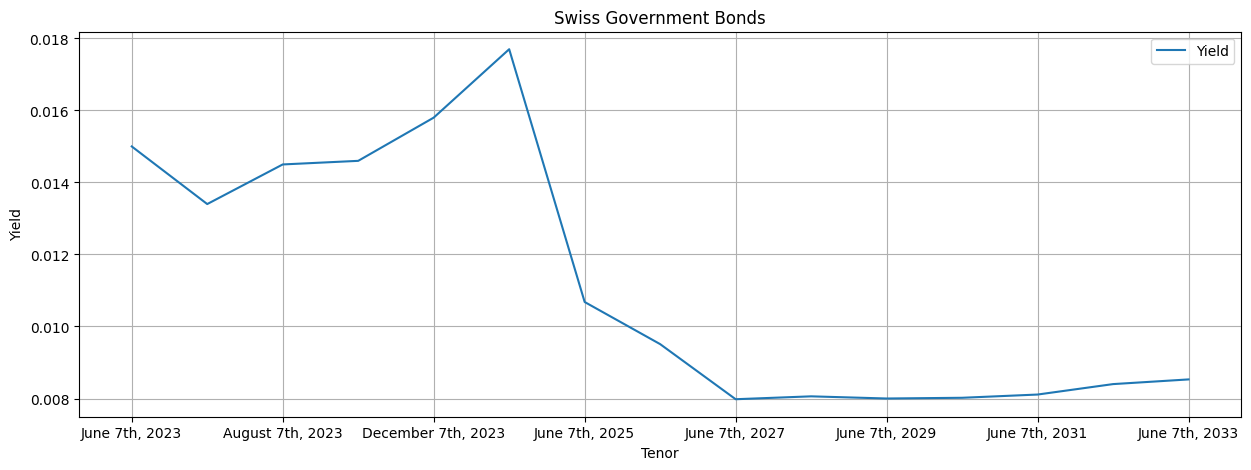

In [6]:
df_raw_yields.plot(figsize=(15,5), ylabel='Yield', xlabel='Tenor', grid=True, title='Swiss Government Bonds')

In [7]:
params = [raw_index_tenor, raw_yield, settings.day_counter, settings.calendar]

methods_curves = {
    "ZeroCurve": ql.ZeroCurve(*params),
    #"LogLinearZeroCurve": ql.LogLinearZeroCurve(*params),
    "CubicZeroCurve": ql.CubicZeroCurve(*params),
    "NaturalCubicZeroCurve": ql.NaturalCubicZeroCurve(*params),
    #"LogCubicZeroCurve": ql.LogCubicZeroCurve(*params),
    #"MonotonicCubicZeroCurve": ql.MonotonicCubicZeroCurve(*params)
}

df_index_tenors = pd.DataFrame(index=[row[0] for row in list(methods_curves.values())[0].nodes()])
[methods_curves[curve].enableExtrapolation() for curve in methods_curves]
end_date = list(methods_curves.values())[0].maxDate()
curve_dates = [ ql.Date(serial) for serial in range(settings.today.serialNumber(), end_date.serialNumber()+1) ]
index_curve_name = methods_curves.keys()

display(df_index_tenors)

""
"June 7th, 2023"
"July 7th, 2023"
"August 7th, 2023"
"September 7th, 2023"
"December 7th, 2023"
"June 7th, 2024"
"June 7th, 2025"
"June 7th, 2026"
"June 7th, 2027"
"June 7th, 2028"


0 - June 7th, 2023: 0.015
1 - July 7th, 2023: 0.0134
2 - August 7th, 2023: 0.0145
3 - September 7th, 2023: 0.0146
4 - December 7th, 2023: 0.0158
5 - June 7th, 2024: 0.0177
6 - June 7th, 2025: 0.01068
7 - June 7th, 2026: 0.00951
8 - June 7th, 2027: 0.00798
9 - June 7th, 2028: 0.00806
10 - June 7th, 2029: 0.008
11 - June 7th, 2030: 0.00802
12 - June 7th, 2031: 0.00811
13 - June 7th, 2032: 0.0084
14 - June 7th, 2033: 0.00853


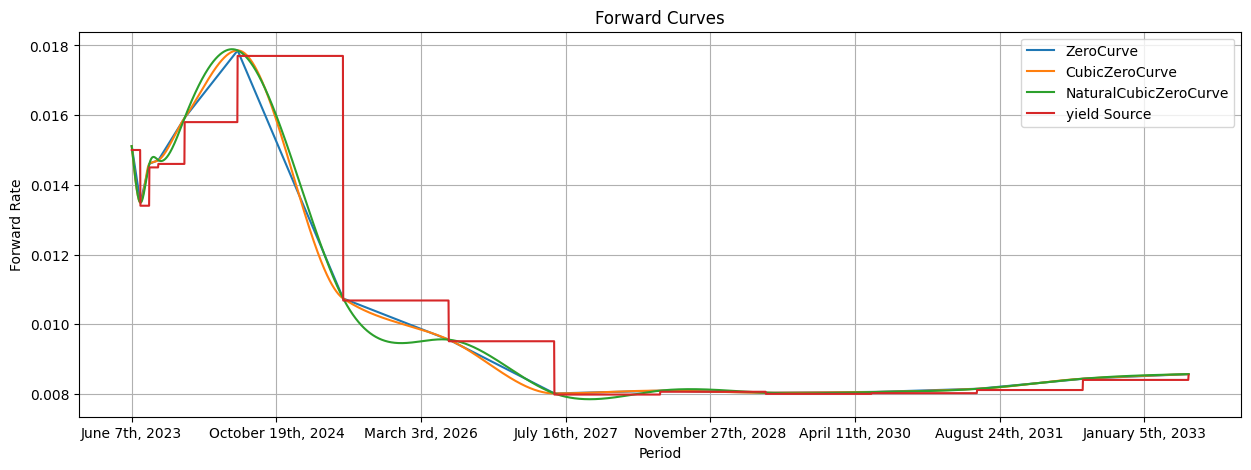

In [8]:
NotebookHelper.plot_forward_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

0 - June 7th, 2023: 0.015
1 - July 7th, 2023: 0.0134
2 - August 7th, 2023: 0.0145
3 - September 7th, 2023: 0.0146
4 - December 7th, 2023: 0.0158
5 - June 7th, 2024: 0.0177
6 - June 7th, 2025: 0.01068
7 - June 7th, 2026: 0.00951
8 - June 7th, 2027: 0.00798
9 - June 7th, 2028: 0.00806
10 - June 7th, 2029: 0.008
11 - June 7th, 2030: 0.00802
12 - June 7th, 2031: 0.00811
13 - June 7th, 2032: 0.0084
14 - June 7th, 2033: 0.00853


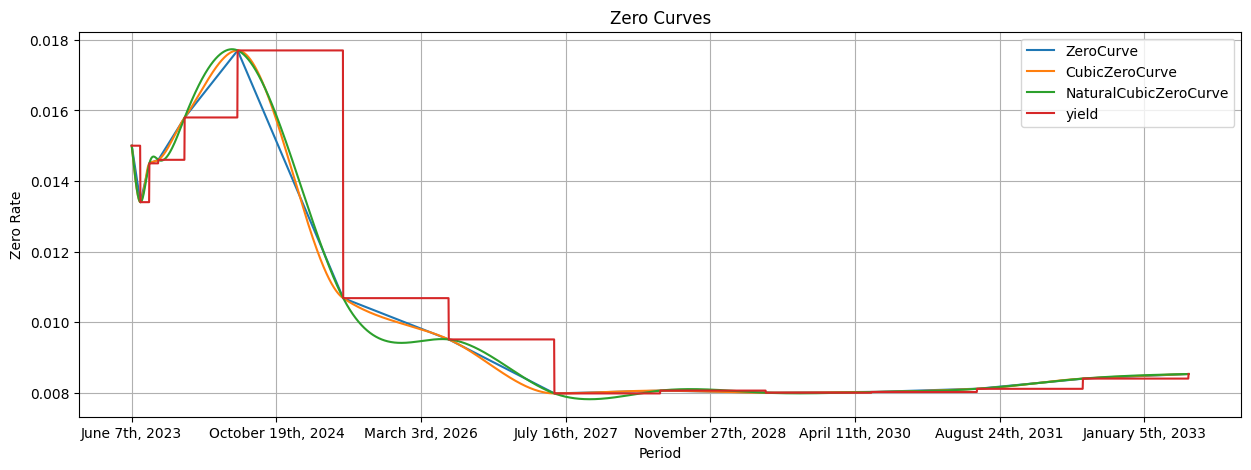

In [9]:
NotebookHelper.plot_zero_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

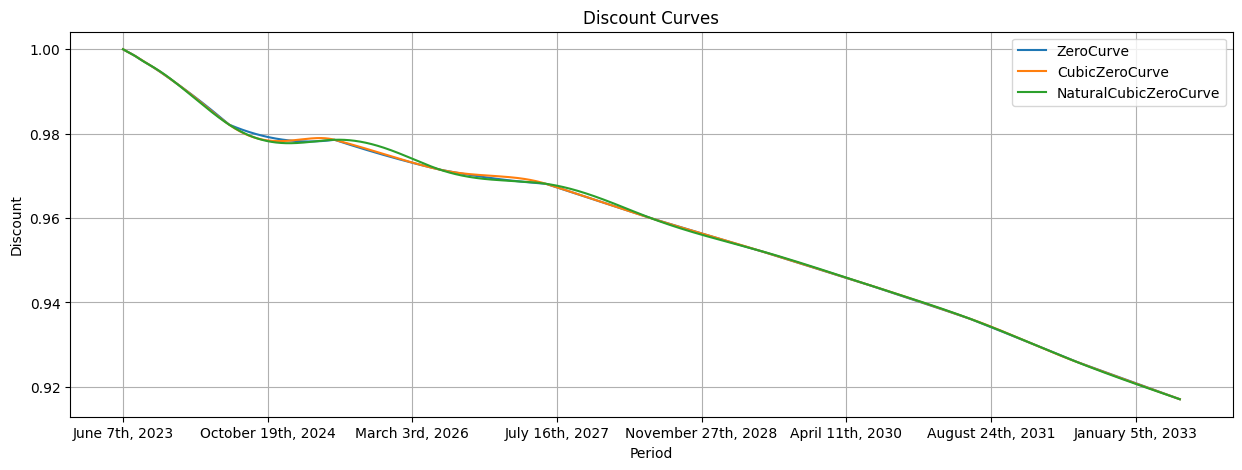

In [10]:
NotebookHelper.plot_discount(curve_dates, methods_curves, settings, index_curve_name)